<a href="https://colab.research.google.com/github/adbioc/Spectroscopy/blob/main/CD_nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NOV 2020 PLANS

## Three peptide classes 

- AAGY (FULLY OPEN)
- ABGY (FOLDED BUT!!)
- AMV (NICELY FOLDED)


## Peptide sequences 
### Amino acid **sequence** of the L-Ala, **all-L AAGY** peptide

Ac-Ala- Ala 2-Ala-Lys-Ala- Ala 6-Lys-Ala-Lys-Ala- Ala 11-Gly-Gly-Tyr-NH2

### Amino acid **sequence** of the Nα-acetylated Aib-based, **all-L ABGY** peptide

Ac-Ala-Aib2-Ala-Lys-Ala-Aib6-Lys-Ala-Lys-Ala-Aib11-Gly-Gly-Tyr-NH2

### Amino acid sequence of its **all-L-AMV** peptide analog

Ac-Ala-AMV2-Ala-Lys-Ala- AMV6-Lys-Ala-Lys-Ala- AMV11-Gly-Gly-Tyr-NH2

## For each peptide T-variation and TFE (helix inducing solvent) variation is avialable 
## Key observation  
- AAGY and ABGY shows NO isosbestic point in water
- AAGY at higher TFE and ABGY at lower TFE shows isosbestic point
- AMV shows clear isosbestic point in all condition (water/TFE)
- Sharpness of isosbestic point enhances with 
  - increase of TFE for AAGY and ABGY
  -For AMV sharpness in isosbestic point is moderate even in only water.

## Questions asked 
We want to explore
- whether can we get any thermodynamic correlation between three states especially in water (as in drug design water is acting as only solvent) and also in TFE
- can appearance of isosbestic point and its nature of sharpness indicates/add something more in its thermodynamic parameters
- can  these three sets of peptides and their thermodynamic aspects be used as model/template for understanding the characteristics/behavior of protein system (e.g IDP, induced helical system or fully ordered).

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

# Let us first explore the spectral data character 
- There are two ways of reading pandas files 
- df=pd.read_excel(xlsfile,sheet_name=<sheetName>) 
- df=pd.ExcelFile(<xlsfile>) . We can find out the sheet names by df.sheet_names
- For simplicity we shall first explore all the 0% TFE data 

In [129]:
os.chdir("/content/drive/My Drive/Raja_CD/")


In [130]:
!ls *.xlsx

AMV_as_function_of_TFE_New.xlsx  AMV_Data.xlsx
AMV_Data_All.xlsx		 AMV_R1_R2_function_of_TFE_New.xlsx


# We may note that df11_amv contains the 0% TFE data for AMV 

In [131]:
os.chdir("/content/drive/My Drive/Raja_CD/")
df1_amv=pd.ExcelFile('AMV_Data_All.xlsx')
n1_amv=df1_amv.sheet_names
print(n1_amv)
df11_amv=pd.read_excel('AMV_Data_All.xlsx',sheet_name=n1_amv[0])
df11_amv # 11 stands for 0 %TFE 

['0% TFE', '10% TFE', '20% TFE', '30% TFE', 'Acetonitrile', 'Methanol']


,Wavelength,5,10,15,20,25,35,45,55
0,260.0,0.00705,0.00883,0.00908,0.00913,0.00511,0.00198,0.00700,0.00339
1,259.9,0.00952,0.01337,0.01542,0.01423,0.01638,0.01337,0.01894,0.00966
2,259.8,0.01178,0.01724,0.02103,0.01863,0.02656,0.02318,0.02966,0.01571
3,259.7,0.01386,0.02049,0.02597,0.02236,0.03572,0.03152,0.03924,0.02152
4,259.6,0.01576,0.02320,0.03028,0.02548,0.04392,0.03849,0.04775,0.02709
...,...,...,...,...,...,...,...,...,...
746,185.4,19.86155,14.95702,13.09017,11.14397,6.77257,8.40237,7.33651,4.06525
747,185.3,19.60550,14.96158,12.87344,10.98307,6.67137,8.23553,7.73747,4.16085
748,185.2,19.31594,14.96559,12.59940,10.78952,6.54669,8.07614,8.12451,4.25196
749,185.1,19.01277,14.97626,12.24852,10.59471,6.38678,7.91709,8.47293,4.32562


In [132]:
os.chdir("/content/drive/My Drive/Raja_CD/freshpep")
df1_aagy=pd.ExcelFile('AAGY_Function of temperature.xlsx')
n1_aagy=df1_aagy.sheet_names
print(n1_aagy)



['0% TFE', '20% TFE', '40% TFE', '50% TFE']


#*df11_AAGY* 0% TFE for AAGY

In [133]:
df11_aagy=pd.read_excel('AAGY_Function of temperature.xlsx',sheet_name=n1_aagy[0])
df11_aagy

,Wavelength,2C,6C,15C,25C,35C,45C
0,250.0,0.01711,0.12637,-0.01588,0.09520,0.06253,-0.06758
1,249.9,0.01649,0.12629,-0.01574,0.09492,0.06209,-0.06694
2,249.8,0.01584,0.12618,-0.01559,0.09459,0.06159,-0.06634
3,249.7,0.01517,0.12605,-0.01544,0.09418,0.06102,-0.06577
4,249.6,0.01447,0.12588,-0.01528,0.09371,0.06038,-0.06523
...,...,...,...,...,...,...,...
646,185.4,2.13429,-1.75110,-3.19901,-5.24095,-5.93852,-6.31083
647,185.3,2.04907,-1.88684,-3.30517,-5.41692,-6.08896,-6.40434
648,185.2,1.95085,-2.03674,-3.42735,-5.61157,-6.25783,-6.51295
649,185.1,1.83932,-2.20114,-3.56600,-5.82541,-6.44566,-6.63709


# df11_ABGY 0% TFE 


In [134]:
os.chdir("/content/drive/My Drive/Raja_CD/freshpep")
df1_abgy=pd.ExcelFile('ABGY_Function of temperature.xlsx')
n1_abgy=df1_abgy.sheet_names
print(n1_abgy)

df11_abgy=pd.read_excel('ABGY_Function of temperature.xlsx',sheet_name=n1_abgy[0])

df11_abgy

['0% TFE', '5% TFE', '10% TFE', '15% TFE', '30% TFE', '40% TFE']


,Unnamed: 0,5,10,15,20,25,30,35,40,45,50
0,250.0,-0.016754,0.004533,-0.024483,-0.008288,-0.011268,0.036795,0.005128,0.037262,0.036612,0.041733
1,249.9,-0.019089,0.006868,-0.023374,-0.008169,-0.010490,0.028750,0.008095,0.033068,0.031021,0.036344
2,249.8,-0.021401,0.008883,-0.022450,-0.008219,-0.009973,0.021085,0.010485,0.028929,0.025549,0.030956
3,249.7,-0.023695,0.010577,-0.021712,-0.008443,-0.009721,0.013800,0.012303,0.024835,0.020192,0.025569
4,249.6,-0.025980,0.011996,-0.021163,-0.008837,-0.009734,0.006882,0.013562,0.020797,0.014945,0.020186
...,...,...,...,...,...,...,...,...,...,...,...
596,190.4,1.515150,0.061355,-1.352510,-2.229780,-2.453280,-2.756780,-3.058800,-3.350490,-4.379660,-4.758480
597,190.3,1.423990,-0.011848,-1.350000,-2.255210,-2.473630,-2.771430,-3.071980,-3.363670,-4.391520,-4.777300
598,190.2,1.332490,-0.085151,-1.280000,-2.284010,-2.496670,-2.788010,-3.086910,-3.378600,-4.404960,-4.795990
599,190.1,1.240860,-0.158448,-1.400000,-2.312170,-2.519200,-2.804230,-3.101510,-3.393200,-4.418100,-4.814490


# Now let us have the temperature varying spectra for AMV, AAGY and ABGY 

In [135]:
def findT(df):
  T=[]
  TTCD=df
  ll=list(TTCD.columns.values)
  ll.remove(ll[0])
  return np.array(ll)

# FOR AMV 

In [136]:
T_amv=findT(df11_amv)
T_amv

array([ 5, 10, 15, 20, 25, 35, 45, 55])

## For AAGY 

In [137]:
T_aagy=findT(df11_aagy)
T_aagy


array(['2C', '6C', '15C', '25C', '35C', '45C'], dtype='<U3')

# Since the temperature is coming in a format that contains a string we have to strip the string C 

In [138]:
def tonumbers(s):
  # 20C=>20
  S=[]
  for i in s:
    S.append(int(re.search(r"\d+", i).group(0)))
  return(S)
T_aagyn=tonumbers(T_aagy)
T_aagyn

[2, 6, 15, 25, 35, 45]

## For ABGY 

In [139]:
T_abgy=findT(df11_abgy)
T_abgy # Comes in numbers - no conversion required

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Now Let us draw the spectra for each set (AMV,AAGY,ABGY)at 0% (or at 5% TFE, when 0% data is not available)  

In [140]:
def readCDT(df,T,pepname):# T must be in numbers 
  
  X=df.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  for i in range(c):
      plt.plot(lam,X[:,i],label=str(T[i]))
      plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title(['$T$ Variation in C',pepname])
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return T,lam,X 

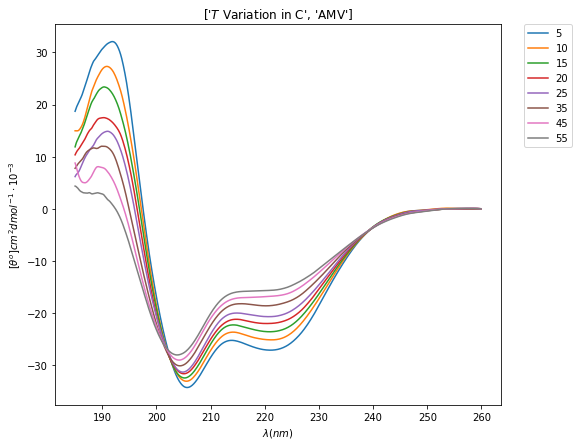

In [141]:
 T_amv,lam_amv,X_amv = readCDT(df11_amv,T_amv,'AMV')

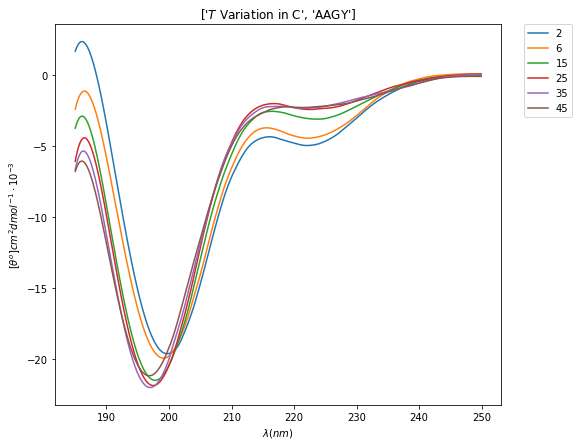

In [142]:
 T_aagy,lam_aagy_amv,X_aagy = readCDT(df11_aagy,T_aagyn,'AAGY')

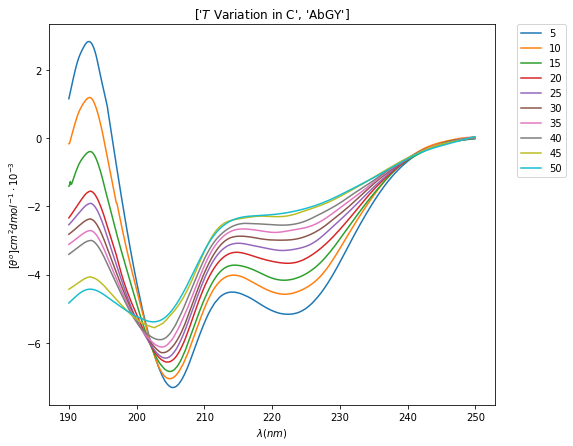

In [143]:
 T_abgy,lam_abgy_amv,X_abgy = readCDT(df11_abgy,T_abgy,'AbGY')

# Subroutine for ratio plot

In [144]:
def ratio_plots(TT,X,lam):
  # T  and X are obtained from function readcdT
  # Given X the function plots the ratio 
  # of 222:206 and 192:206 
  l_222=np.where(lam==222)[0]
  l_206=np.where(lam==206)[0]
  l_192=np.where(lam==192)[0]
  rat1=X[l_222[0],:]/X[l_206[0],:]
  rat2=X[l_192[0],:]/X[l_206[0],:]
  fig,ax =  plt.subplots(2,2,figsize=(10,8))

  #fig, (ax1, ax2,ax3,ax4) = plt.subplots(2, 2, figsize=(6,4))
  #plt.subplots_adjust(wspace=0.3, hspace=0.2)
  # ax[0][0].set_title("222:206")
  # ax[0][1].set_title("222:206")
  # ax[1][0].set_title("Ratio(R) Plots")
  # ax[1][1].set_title("Inv R Plots")



  ax[0][0].plot(TT,rat1,'bo-')
  ax[0][1].plot(TT,rat2,'co-')
  ax[1][0].plot(rat1,rat2,'ro-')
  ax[1][1].plot(1./rat1,1/rat2,'go-')
  ax[0][0].set(xlabel='T$^o$C', ylabel='R1')
  ax[0][1].set(xlabel='T$^o$C', ylabel='R2')
  ax[1][0].set(xlabel='R1', ylabel='R2')
  ax[1][1].set(xlabel='1/R1', ylabel='1/R2')

  return rat1,rat2

# Ratio plot of AMV

(array([0.79011302, 0.7610621 , 0.73080726, 0.70023277, 0.66993735,
        0.63346687, 0.5997108 , 0.58149269]),
 array([-0.93717025, -0.79963939, -0.68096366, -0.52671218, -0.46288976,
        -0.36531415, -0.19640212, -0.02451214]))

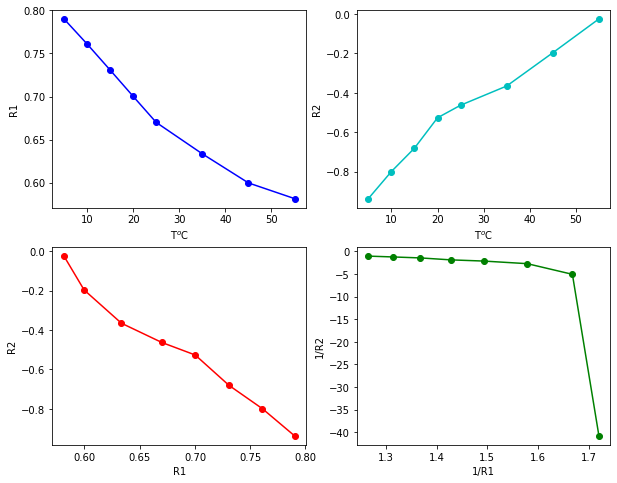

In [145]:
 ratio_plots(T_amv,X_amv,lam_amv)

# Ratio plot for AAGY

(array([0.37827558, 0.35819303, 0.27171867, 0.23294331, 0.22799433,
        0.22657376]),
 array([0.64301623, 0.83813032, 1.26417055, 1.43805725, 1.57698686,
        1.61691526]))

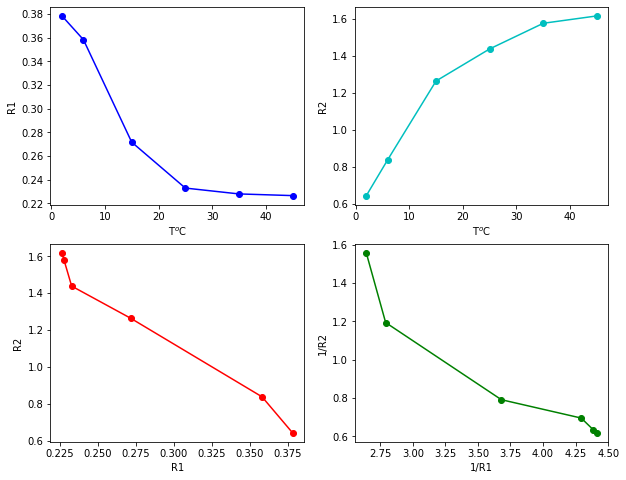

In [146]:
 ratio_plots(T_aagy,X_aagy,lam_aagy_amv)

In [147]:
# Ratio plot for ABGY

(array([0.7119397 , 0.66246763, 0.6226553 , 0.57730622, 0.53696735,
        0.50565017, 0.48449663, 0.47421209, 0.46281237, 0.45468991]),
 array([-0.35773168, -0.13964902,  0.08946014,  0.27717452,  0.33904697,
         0.4204133 ,  0.49921025,  0.5776444 ,  0.84070729,  0.93124138]))

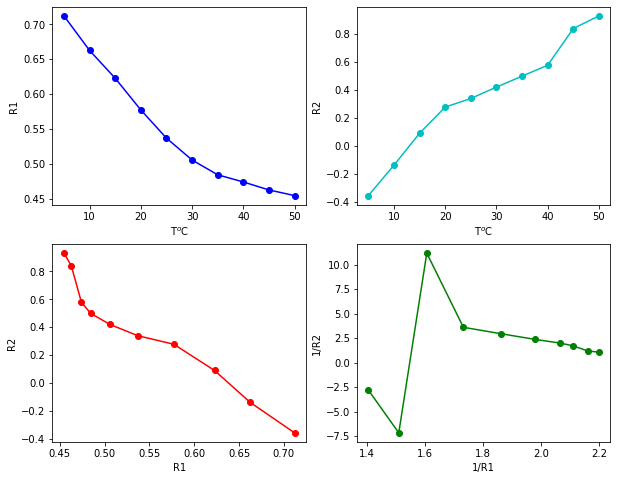

In [148]:
 ratio_plots(T_abgy,X_abgy,lam_abgy_amv)

# Substoutine for SVD 

In [149]:
def eigen_reconstruct(k,X):# singular elements
  from numpy import linalg as LA
  U, s, VT = LA.svd(X)
  Sigma = np.zeros((X.shape[0], X.shape[1]))
  Sigma[:min(X.shape[0], X.shape[1]), :min(X.shape[0], X.shape[1])] = np.diag(s)
  X_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
  np.shape(VT)
  #print("Initial population fraction of the two Major SVD componenrs",abs(np.round(VT[0,0],4)),abs(np.round(VT[1,0],4)))
  return X_approx,s,VT
def epec(k,X,s,lam):# Reconstruction using k singular elements
    Sigma = np.zeros((X.shape[0], X.shape[1]))
    Sigma[:min(X.shape[0], X.shape[1]), :min(X.shape[0], X.shape[1])] = np.diag(s)
    U, s, V = LA.svd(X)
    XY=U[:, :k] @ Sigma[:k, :k]
    np.shape(XY)
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    plt.subplots_adjust(wspace=0.3, hspace=0.2)
    ax.plot(lam,XY[:,0])
    ax.plot(lam,XY[:,1])
    ax.set_title("SVD 1 and SVD2")
    return XY
  

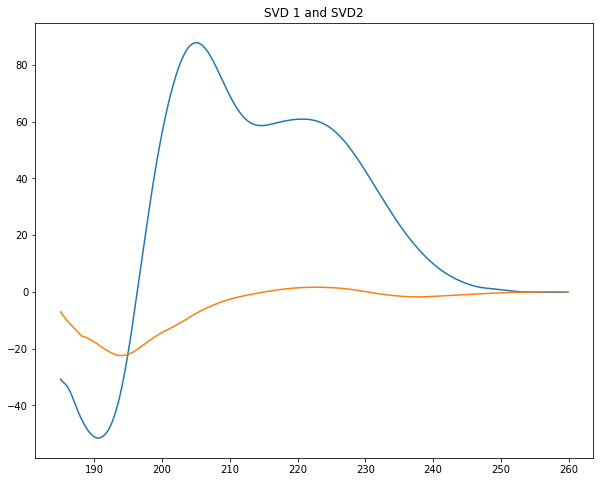

In [150]:
X_amv,samv,VTamv=eigen_reconstruct(2,X_amv)
XY2AMV=epec(2,X_amv,samv,lam_amv)

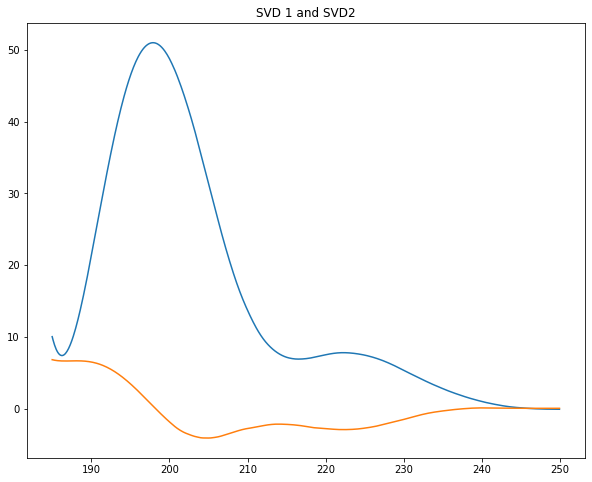

In [151]:
X_aagy,saagy,VTaagy=eigen_reconstruct(2,X_aagy)
XY2AAGY=epec(2,X_aagy,saagy,lam_aagy_amv)



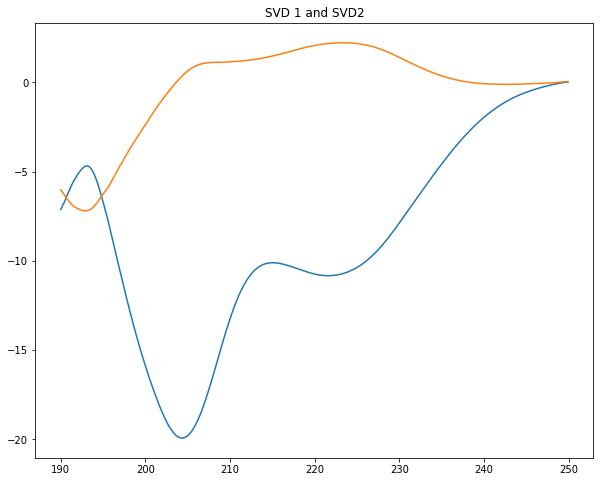

In [152]:
X_abgy,sabgy,VTabgy=eigen_reconstruct(2,X_abgy)
# plt.plot(lam_abgy_amv,X_abgy[:,0])
# plt.plot(lam_abgy_amv,X_abgy[:,1])
XY2ABGY=epec(2,X_abgy,sabgy,lam_abgy_amv)


# Calculating f from SVD1 & SVD2 

We can condider a given spectrum S and two SVD components by y1 anf y2 and observed spectrum by S :

\begin{align}
Sobs_{\lambda}= \cup(y_{\lambda})\\ 
SVD1=\cup(y1_{\lambda})\\
SVD2=\cup(y2_{\lambda})\\
Scal_{\lambda}= f.y1_{\lambda} + (1-f)y2_{\lambda}\\
\end{align}


Now the minimization of an error function phi can be sought:
\begin{equation}
\phi = \sum_{\lambda}(Sobs_{\lambda}-Scal_{\lambda})^2\\
\end{equation}
Now 

\begin{equation}
\frac{\delta \phi}{\delta f}=0 
\end{equation}
implies, 

\begin{align}
f = \frac{\sum_{\lambda}(y_{\lambda}-y2_{\lambda})\Delta y_{\lambda}}{\sum_{\lambda}\Delta y_{\lambda}^2} \\ 
\end{align}

Here, $Sobs_{\lambda} = y_{\lambda}$ and $\Delta y_{\lambda}=y1_{\lambda}-y2_{\lambda}$

# Subroutine to determine  fraction of the two components assuming that at any condition (temperature) the combination of the two can lead to appropriate spectral reconstruction. 

In [153]:
def svd2f(X,XY):
  # Two SVD components
  y1=XY[:,0]
  y2=XY[:,1]
  dy=y1-y2
  r,c=X.shape
  f=[]
  for i in range(c):
    N=np.dot(X[:,i]-y2,y1-y2)
    D=np.dot(dy,dy)
    f.append(np.sum(N)/np.sum(D))
  f=np.abs(f)
  return f

van't Hoff Approach
- $f = f_o.e^ \frac{-\Delta G_o}{RT}$
- Thus if we plot log(f) against 1/T we may get an approximate value of thermodynamic parametrs 
- See  <https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Map%3A_Physical_Chemistry_(McQuarrie_and_Simon)/26%3A_Chemical_Equilibrium/26.07%3A_The_Van't_Hoff_Equation></p>
- The equation that follows is derivable assuming</p> $K_{eq}=f= \frac{Component2}{Component1}$</p>

# Let us first code for a simple linear fit program 

In [155]:
from scipy.optimize import curve_fit
def linfit(x, m, c):
    return m*x+c


# Assuming that we have the information on temperature in $^o$C and  fraction of the two singular components  we may consider the follwing code for evaluation of $\Delta G$,$\Delta H$ and $\Delta S$</p>
- $f = f_o.e^ \frac{-\Delta G_o}{RT}$
- Thus if we plot log(f) against 1/T we may get an approximate value of thermodynamic parametrs 
-  <https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Map%3A_Physical_Chemistry_(McQuarrie_and_Simon)/26%3A_Chemical_Equilibrium/26.07%3A_The_Van't_Hoff_Equation></p>
- The equation that follows is derivable assuming</p> $K_{eq}=f= \frac{SVD1}{SVD2}$</p>
As $\Delta G = -RT ln f = \Delta H - T \Delta S$ we have 
\begin{equation}
log f = -\frac{\Delta H }{RT} +\frac{\Delta S}{R}
\end{equation}
Thus if we plot log of f against 1/T we should obtain the slope = -$\Delta H/R$ and intercept as 

Plotting log(K ) against 1/T, the slope of the linear curve should be  −Δ𝐻/𝑅, provided $\Delta S$ remains indepndent of temperature. 

In [213]:
def thermoSVD(fraction,t,remarks):
  R=1.99547102832
  T=t+273.0
  x=T
  ff=np.log(fraction)
  pars, cov = curve_fit(f=linfit, xdata=1/T, ydata=ff, p0=[0, 0], bounds=(-np.inf, np.inf))
  plt.plot(1/x,ff,'ko')
  plt.xlabel('1/T')
  plt.ylabel('log f')
  deltaH=-R*pars[0]
  deltaS=R*pars[1]
  plt.title([remarks,'Delta H=',str(deltaH/1000)[0:4],'KCal/mol',str(deltaS)[0:4],'cal/mol'])
  ix=np.linspace(min(1/x),max(1/x),100)
  yix=pars[0]*ix+pars[1]
  plt.plot(ix,yix,'k-')
  plt.show()
  return pars,cov,deltaH,deltaS


In [216]:
Famv=svd2f(X_amv,XY2AMV)
Faagy=svd2f(X_aagy,XY2AAGY)
Fabgy=svd2f(X_abgy,XY2ABGY)

# The fraction at different temperature T_amv may lead to vant'Hoff's plot


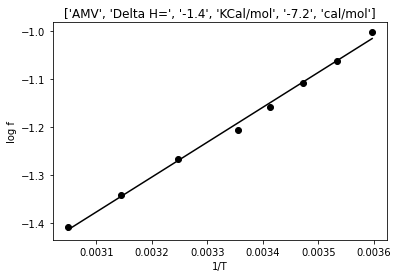

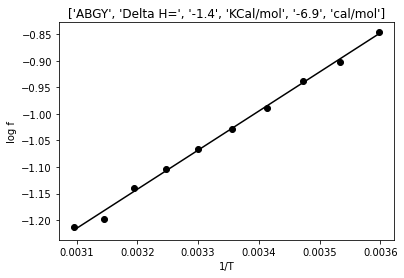

In [220]:
parsamv,cov_amv,deltaH_amv,deltaS_amv=thermoSVD(Famv,T_amv,"AMV")
#parsaagy,cov_aagy,deltaH_aaygy,deltaS_aagy=thermoSVD(Faagy,T_aagy,"AAGY")
parsabgy,cov_abgy,deltaH_abgy,deltaS_abgy=thermoSVD(Fabgy,T_abgy,"ABGY")



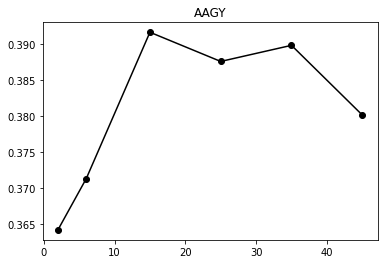

In [229]:
#parsaagy,cov_aagy,deltaH_aaygy,deltaS_aagy=thermoSVD(Faagy,T_aagy,"AAGY")
Faagy=svd2f(X_aagy,XY2AAGY)
plt.plot(T_aagy,Faagy,'ko-')
plt.title('AAGY')
plt.show()

In [189]:
1/T_amv

array([0.2       , 0.1       , 0.06666667, 0.05      , 0.04      ,
       0.02857143, 0.02222222, 0.01818182])